C:\Users\yahya\AppData\Local\Temp\ipykernel_1740\242370861.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['Longitude', 'Latitude']).sum()['NSBI Financial Contribution (Commitment/Announced)'].reset_index()
C:\Study\Data Mining\documents\initial analysis report\data_mining_venv\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


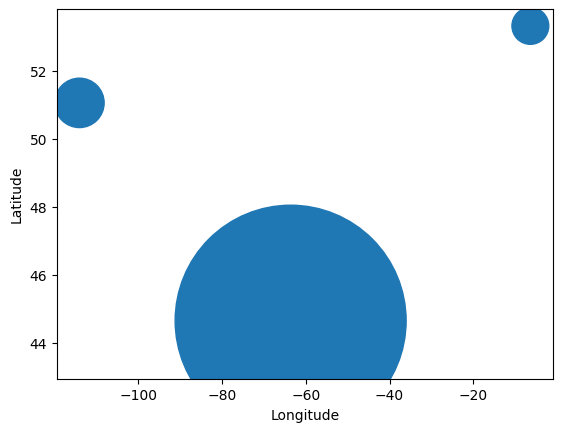

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file into pandas DataFrame
df = pd.read_csv('./datasets/Scotia_Business_Inc._Export_Development_and_Investment_Attraction_Activity.csv')

# group by longitude and latitude, sum financial contribution
grouped = df.groupby(['Longitude', 'Latitude']).sum()['NSBI Financial Contribution (Commitment/Announced)'].reset_index()

# sort by financial contribution in descending order
sorted_grouped = grouped.sort_values(by='NSBI Financial Contribution (Commitment/Announced)', ascending=False)

# plot the top 10 regions on a scatter plot
plt.scatter(sorted_grouped['Longitude'], sorted_grouped['Latitude'], s=sorted_grouped['NSBI Financial Contribution (Commitment/Announced)']/1000)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
import folium
import pandas as pd

#According to this NSBI_AR2021-2022_Aug11, the region that has the highest IDE score is Halifax with a score of 7.1. 
# This means that Halifax has the most favourable conditions for innovation-driven entrepreneurship among 
# all regions in Nova Scotia and ranks 9th among all regions in Canada. Halifax also has the highest NSBI 
# financial contribution with $5,791,000 and the highest number of sectors with 8.


# read CSV file into pandas DataFrame
df = pd.read_csv('./datasets/Scotia_Business_Inc._Export_Development_and_Investment_Attraction_Activity.csv')
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)
# create a map centered at the median of the latitudes and longitudes
m = folium.Map(location=[df['Latitude'].median(), df['Longitude'].median()], zoom_start=4)

# add markers for each data point
for i, row in df.iterrows():
    # define the marker color based on the NSBI Financial Contribution value
    if row['NSBI Financial Contribution (Commitment/Announced)'] > 15000:
        color = 'green'
    elif row['NSBI Financial Contribution (Commitment/Announced)'] > 5000:
        color = 'yellow'
    else:
        color = 'red'
    # add the marker to the map
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=row['Place Name'], 
                  icon=folium.Icon(color=color)).add_to(m)

# display the map
m

C:\Users\yahya\AppData\Local\Temp\ipykernel_1740\1682982313.py:22: UserWarning: color argument of Icon should be one of: {'blue', 'lightred', 'darkgreen', 'gray', 'lightgray', 'lightblue', 'black', 'lightgreen', 'beige', 'pink', 'orange', 'purple', 'red', 'white', 'cadetblue', 'darkred', 'green', 'darkblue', 'darkpurple'}.
  icon=folium.Icon(color=color)).add_to(m)
